In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from src.data_gen import read_instances

instances = read_instances(filename='TSP50.pkl')

train_size = 64
test_size = 128

train_instances = instances[:train_size]
test_instances = instances[train_size:train_size+test_size]

In [16]:
from src.training import load_model
from src.models.transformer_v5 import TSPTransformer

model = load_model(TSPTransformer, model_name="model_v5_3")

In [ ]:
from src.rl.reinforce_greedy import reinforce

eps = 100
lr = 1e-4

model, cost, loss = reinforce(model, train_instances, test_instances, eps, lr)

Episodio: 0	Costo batch sampleado: 5.93	Costo batch greedy: 5.90	Costo batch validación: 5.89	Loss: -0.0042
Episodio: 1	Costo batch sampleado: 6.08	Costo batch greedy: 5.90	Costo batch validación: 5.88	Loss: -0.0169
Episodio: 2	Costo batch sampleado: 6.10	Costo batch greedy: 5.87	Costo batch validación: 5.88	Loss: -0.0244
Episodio: 3	Costo batch sampleado: 6.07	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0209
Episodio: 4	Costo batch sampleado: 6.06	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0196
Episodio: 5	Costo batch sampleado: 6.09	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0212
Episodio: 6	Costo batch sampleado: 6.08	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0228
Episodio: 7	Costo batch sampleado: 6.09	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0261
Episodio: 8	Costo batch sampleado: 6.11	Costo batch greedy: 5.86	Costo batch validación: 5.88	Loss: -0.0219
Episodio: 9	Costo batch samp

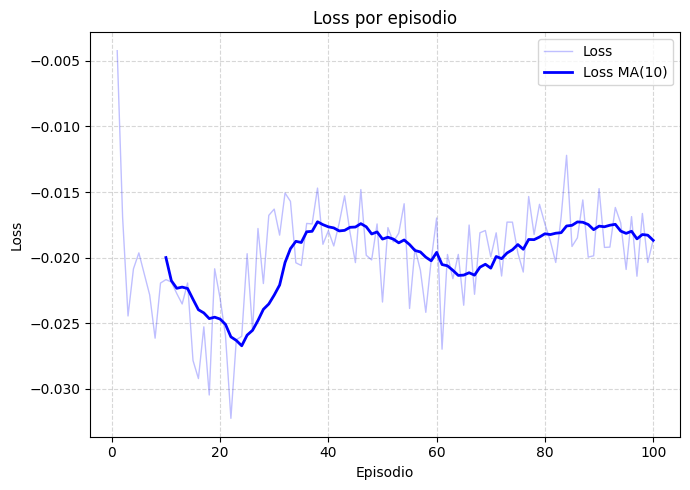

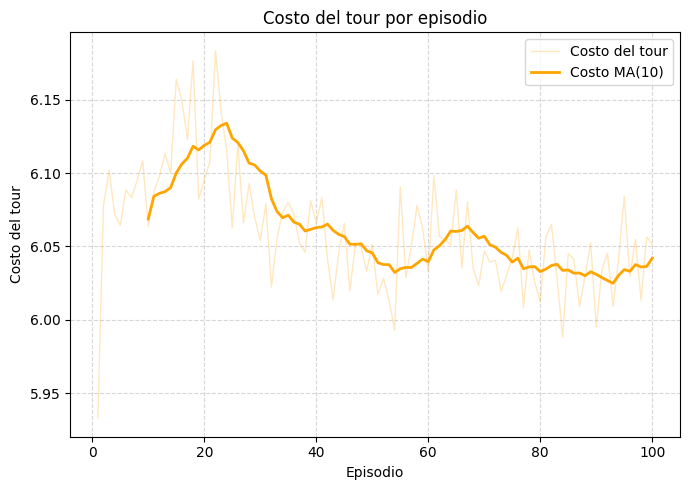

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(values, window):
    if window <= 1:
        return values
    return np.convolve(values, np.ones(window)/window, mode='valid')

def plot_loss(loss, window=50):
    plt.figure(figsize=(7, 5))

    epochs = np.arange(1, len(loss) + 1)
    plt.plot(epochs, loss, label="Loss", linewidth=1, alpha=0.25, color='blue')

    # Moving average
    ma = moving_average(loss, window)
    ma_epochs = np.arange(window, len(loss) + 1)
    plt.plot(ma_epochs, ma, label=f"Loss MA({window})", linewidth=2, color='blue')

    plt.xlabel('Episodio')
    plt.ylabel('Loss')
    plt.title('Loss por episodio')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_cost(cost, window=50):
    plt.figure(figsize=(7, 5))

    epochs = np.arange(1, len(cost) + 1)
    plt.plot(epochs, cost, label="Costo del tour", linewidth=1, alpha=0.25, color='orange')

    # Moving average
    ma = moving_average(cost, window)
    ma_epochs = np.arange(window, len(cost) + 1)
    plt.plot(ma_epochs, ma, label=f"Costo MA({window})", linewidth=2, color='orange')

    plt.xlabel('Episodio')
    plt.ylabel('Costo del tour')
    plt.title('Costo del tour por episodio')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_loss(loss, window=10)
plot_cost(cost, window=10)

In [7]:
from src.training import save_model
save_model(model, model_name="model_rl")

In [8]:
from src.training import load_model
from src.models.transformer_v5 import TSPTransformer

model = load_model(TSPTransformer, model_name="model_rl")

In [11]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver
from src.data_gen import read_instances

instance_file = "benchmarks/b100.pkl"
instances = read_instances(instance_file)
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for instance in instances:
    model_sol = model_solver.solve(instance)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 6.264747444257244
